### week 8

# Constrained Optimisation and Maximum Entropy Modelling

### Uncertainty

Here we consider a function $H$ that expresses **uncertainty**. $H$ should satisfy the following set of requirements:

1. $H(p_1, \ldots, p_n)$ is a maximum when $\displaystyle p_1 = \ldots = p_n = \frac{1}{n}$.

2. $H$ is a symmetric function of the arguments $p_1, \ldots, p_n$. It means that
$$
  H(p_1, \ldots, p_n) = H(p_{\pi(1)}, \ldots, p_{\pi(n)})
$$
for any permutation $\pi$ of $(1, \ldots, n)$. In other words, only the probabilities matter, not their order.

3. $H(p_1, \ldots, p_n) \geq 0$ and the equality holds only when one of $p_i$ is $1$. It means that uncertainty is inherently a positive quantity, and it is zero only when there is no randomness present.
      
4. $$
  H\left(\frac{1}{n}, \ldots, \frac{1}{n}\right) \leq H\left(\frac{1}{n + 1}, \ldots, \frac{1}{n + 1}\right)
$$
(interpretation) Two-horse race is less uncertain than a three-horse race.

5. $$
  H(p_1, \ldots, p_n, 0) = H(p_1, \ldots, p_n)
$$
(interpretation) Uncertainty of a six-sided die is the same as a seven-sided die that has no chance of showing 7 but otherwise fair.

6. $H(p_1, \ldots, p_n)$ is a continuous function of its arguments. It means that a small change in the probabilities should not drastically affects the uncertainty.

7. If $m$ and $n$ are positive integers,
$$
  H\left(\frac{1}{mn}, \ldots, \frac{1}{mn}\right) = H\left(\frac{1}{m}, \ldots, \frac{1}{m}\right) + H\left(\frac{1}{n}, \ldots, \frac{1}{n}\right)
$$
(interpretation) Uncertainty for throwing an $m$-sided die followed by an $n$-sided die should be the sum of individual uncertainties. This is a **linearity condition**.

8. Let $p = p_1 + \ldots + p_m$ and $q = q_1 + \ldots + q_n$ where each $p_i$ and $q_j$ are non-negative. If $p$ and $q$ are positive and $p + q = 1$,
$$
  H(p_1, \ldots, p_m, q_1, \ldots, q_n) = H(p, q) + p H\left(\frac{p_1}{p}, \ldots, \frac{p_m}{p}\right) + q H\left(\frac{q_1}{q}, \ldots, \frac{q_n}{q}\right)
$$
(interpretation) Think about a race in which there are $m$ brown horses and $n$ grey horses with $p_i$ (or $q_j$) being the probability the $i^{th}$ brown horse (or $j^{th}$ grey horse) wins. The total uncertainty in the outcome is the uncertainty associated with a brown or grey winner plus the weighted sum of the uncertainties given that the winner is respectively brown or grey.

### Entropy

Entropy $H$ is defined as
$$
  H = \sum_{i = 1 \ldots m} p_i \log_b \frac{1}{p_i} = - \sum_{i = 1 \ldots m} p_i \log_b p_i
$$

- Typical choices for the base $b$ are $2$, $e$, $10$.

- Suppose the log is taken to the base $2$ (ie, $b=2$), entropy is expressed in *bits*.

- In this notebook, we drop $b$ and use **natural log** with the base $e$, unless otherwise noted.

- The convention is that $\displaystyle 0\log \frac{1}{0} = 0$, because $\displaystyle \lim_{a\rightarrow 0+} a\log \frac{1}{a} \rightarrow 0$.

- $H$ satisfies the requirements 1. to 8. above for measuring the **uncertainty**.

- Alternatively, the entropy of a random variable $X$ may be written as
$$
  H(X) = \sum_{x\in {\cal X}} p(x) \log \frac{1}{p(x)}
$$

- Depending on the context, we may write $H(p)$ for the above quantity.

Here are some examples for calculating entropies with base $2$ and expressing the result in *bits*:

1. A flip of a fair coin:
$$
  H = \frac{1}{2}\log_2 2 + \frac{1}{2}\log_2 2 = 1 \ (\text{bit})
$$

2. A flip of a biased coin, with the head coming up as twice frequently as the tail:
$$
  H = \frac{2}{3}\log_2\frac{3}{2} + \frac{1}{3}\log_2 3 \sim 0.92 \ (\text{bits})
$$

3. A race between four horses, having a chance to win with probabilities $0.4$, $0.3$, $0.2$, and $0.1$:
$$
  H = 0.4\log_2 \frac{1}{0.4} + 0.3\log_2 \frac{1}{0.3} + 0.2\log_2 \frac{1}{0.2} + 0.1\log_2 \frac{1}{0.1} \sim 1.85 \ (\text{bits})
$$

### Entropy: Lower Bound and Upper Bound

We can prove that entropy is *not negative*.

For a random variable $X$:
$$
  0 \leq p(x) \leq 1
  \quad \Longrightarrow \quad \log \frac{1}{p(x)} \geq 0
  \quad \Longrightarrow \quad H(X) = \sum_{x\in {\cal X}} p(x) \log \frac{1}{p(x)} \geq 0
$$
Next, because $H(X) \geq 0$, $H(X) = 0$ implies that
$$
  p(x) \log \frac{1}{p(x)} = 0 \text{ for all } x
  \quad \Longrightarrow \quad p(x) = 0 \text{ or } \log \frac{1}{p(x)} = 0 \text{ for all } x
  \quad \Longrightarrow \quad p(x) = 0 \text{ or } 1 \text{ for all } x
$$
using our standard convention $\displaystyle 0\cdot\log\frac{1}{0} = 0$ because $\displaystyle \lim_{a\rightarrow 0+} a\cdot\log\frac{1}{a} \rightarrow 0$.

Thus $H(X) = 0$ when $p(x) = 1$ for one $x$ and $0$ for the rest. (Recall the probability axiom.)

We can also prove that entropy has an upper bound, defined by the inequality, $H(p) \leq \log |{\cal X}|$, which  is achieved when $p(x)$ is uniformly distributed over all $x\in{\cal X}$.

### More Entropies

There are more extropies, such as *joint entropy*, *conditional entropy* and *mutual information*.

#### Joint Entropy

The joint entropy of $X$ and $Y$ is defined as
$$
  H(X,Y) = \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} p(x,y) \log \frac{1}{p(x,y)}
$$

#### Conditional Entropy

The conditional entropy of $Y$ given $X$ is defined as
\begin{align*}
  H(Y|X)
  &= \sum_{x\in {\cal X}} p(x) H(Y|X = x) \\
  &= \sum_{x\in {\cal X}} p(x) \sum_{y\in {\cal Y}} p(y|x) \log \frac{1}{p(y|x)} \\
  &= \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} p(x,y) \log \frac{1}{p(y|x)}
\end{align*}

#### Mutual information

The mutual information between $X$ and $Y$ is defined as
$$
  I(X;Y) = \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} p(x,y) \log \frac{p(x,y)}{p(x)p(y)}
$$
This $I(X;Y)$ can be rewritten as
$$
  I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X)
$$
It measures the average reduction in uncertainty about $X$ that results from learning the value of $Y$.

### Weather Forecast

How do we forecast tomorrow's weather?

- satellite
- history, or one's experience
- coin

How do we handle information from various sources?

- **backoff:** choose one
    1. Use satellite image by default.
    2. If 1. is not available, rely on statistics (ie, past history).
    3. If 2. is not available, flip a coin prediction.

- **interpolation:** weight each evidence, eg, $0.6\times\text{satellite} + 0.3\times\text{history} + 0.1\times\text{coin}$

- **maximum entropy:** make a least biased decision

### Maximum Entropy

#### Coin Tossing

Suppose a weighted coin has probability $h$ of coming up heads,	entropy of tossing the coin only once is given by
$$
  H(X) = h \log_2 \frac{1}{h} + (1 - h) \log_2 \frac{1}{1 - h}
$$

Entropy is maximised when the coin is fair, ie, unbiased:
<img src="./figs/coin_toss.jpg", width=300, align=center>

#### Concept

- model *all* that is known
- assume *nothing* that is unknown

#### Principle

Given a collection of facts, the **maximum entropy** method choose a model that is *consistent with all facts*, but otherwise *as uniform as possible*.

#### Simple Example

We wish to estimate a joint probability distribution $p(x, y)$ where $x\in\{x_1, x_2\}$ and $y\in\{y_1, y_2\}$, given the constraints
\begin{align*}
  p(x_1, y_1) + p(x_2, y_1) &= 0.6 \\
  p(x_1, y_1) + p(x_1, y_2) + p(x_2, y_1) + p(x_2, y_2) &= 1
\end{align*}
Given these constraints, our objective is to maximise
$$
  H(X, Y) = \sum_{x\in\{x_1, x_2\}} \sum_{y\in\{y_1, y_2\}} p(x, y) \log\frac{1}{p(x, y)}
$$

One distribution that satisfies constrains:

.     | $y_1$ | $y_2$ |
:----:|:-----:|:-----:|:-----:
$x_1$ | 0.5   | 0.1   |
$x_2$ | 0.1   | 0.3   |
total | 0.6   |       | 1.0

The most uniform distribution that satisfies constrains:

.     | $y_1$ | $y_2$ |
:----:|:-----:|:-----:|:-----:
$x_1$ | 0.3   | 0.2   |
$x_2$ | 0.3   | 0.2   |
total | 0.6   |       | 1.0

### Weather Forecast: Analytical Solution Using Lagrange Multiplier

#### Problem

Firstly, we make overly simplified assumption that five weather types, \{misty, foggy, cloudy, sunny, rainy\}, can fully describe weather. Now, suppose that today's weather is \{cloudy\}, what will be tomorrow's weather?

#### A Single Constraint

Initially we have the *total probability* constraint:
$$
  p(misty) + p(foggy) + p(cloudy) + p(sunny) + p(rainy) = 1
$$
There exist infinite combinations of probabilities that may satisfy the constraint above.

The most intuitively appealing model is
\begin{align*}
  p(misty) &= 0.2 \\
  p(foggy) &= 0.2 \\
  p(cloudy) &= 0.2 \\
  p(sunny) &= 0.2 \\
  p(rainy) &= 0.2
\end{align*}
This model allocates the total probability (that is ` 1 ') evenly among five possible weathers. It is the most *uniform* model subject to our knowledge... but what is exactly meant by *uniform*?

Analytically, we wish to maximise the entropy $H(Y)$ given the total probability constraint. Using a Lagrange multiplier $\lambda_1$:
$$
  \Lambda = H(Y) + \lambda_1 \times \text{constraint}
  = \left( - \sum_{y\in {\cal Y}} p(y) \log p(y) \right) + \lambda_1 \left( \sum_{y\in {\cal Y}} p(y) - 1 \right)
$$
and take a partial derivative with respect to $p(y)$:
$$
  \frac{\partial\Lambda}{\partial p(y)} = - \log p(y) - 1 + \lambda_1
$$
Then set $\displaystyle \frac{\partial\Lambda}{\partial p(y)} = 0$ and, finally, get $p(y) = 0.2$ for all $y$.

### Assignment Question 1

Solve $\displaystyle \frac{\partial\Lambda}{\partial p(y)} = 0$ for the weather forecast problem with *a single* constraint to reach the most *uniform* model that is presented above. Show your working fully.

*5 marks*

#### Question 1 Answer

#### Two Constraints

Suppose we have *two* constraints:
\begin{align*}
  p(misty) + p(foggy) + p(cloudy) + p(sunny) + p(rainy) &= 1 \\
  p(misty) + p(foggy) &= 0.3
\end{align*}
By observation, the most *uniform* model is
\begin{align*}
  p(misty) &= 0.15 \\
  p(foggy) &= 0.15 \\
  p(cloudy) &= 0.233... \\
  p(sunny) &= 0.233... \\
  p(rainy) &= 0.233...
\end{align*}

Analytically, we maximise $H(Y)$ given those two constraints:
\begin{align*}
  \Lambda = H(Y)
    & + \lambda_1 \{ p(misty) + p(foggy) + p(cloudy) + p(sunny) + p(rainy) - 1 \} \\
    & + \lambda_2 \{ p(misty) + p(foggy) - 0.3 \}
\end{align*}
and calculate partial derivatives:
$$
  \frac{\partial\Lambda}{\partial p(y)} = \left\{ \begin{array}{ll}
    - \log p(y) - 1 + \lambda_1 + \lambda_2	& y = misty, foggy \\
    - \log p(y) - 1 + \lambda_1		& \text{otherwise}
    \end{array} \right.
$$
Then set $\displaystyle \frac{\partial\Lambda}{\partial p(y)} = 0$.

### Assignment Question 2

Solve $\displaystyle \frac{\partial\Lambda}{\partial p(y)} = 0$ for the weather forecast problem with *two* constraint to reach the most *uniform* model that is presented above. Show your working fully.

*5 marks*

#### Question 2 Answer

#### Three Constraints

Suppose we have *three* constraints:
\begin{align*}
  p(misty) + p(foggy) + p(cloudy) + p(sunny) + p(rainy) &= 1 \\
  p(misty) + p(foggy) &= 0.3 \\
  p(misty) + p(cloudy) &= 0.5
\end{align*}

Solution is no longer obvious, but we still can work on this case analytically.

We maximise $H(Y)$ given three constraints:
\begin{align*}
  \Lambda = H(Y)
    & + \lambda_1 \{ p(misty) + p(foggy) + p(cloudy) + p(sunny) + p(rainy) - 1 \} \\
    & + \lambda_2 \{ p(misty) + p(foggy) - 0.3 \} \\
    & + \lambda_3 \{ p(misty) + p(cloudy) - 0.5 \}
\end{align*}
Thus,
$$
  \frac{\partial\Lambda}{\partial p(y)} = \left\{ \begin{array}{ll}
    - \log p(y) - 1 + \lambda_1 + \lambda_2 + \lambda_3 & y = misty \\
    - \log p(y) - 1 + \lambda_1 + \lambda_2		& y = foggy \\
    - \log p(y) - 1 + \lambda_1 + \lambda_3		& y = cloudy \\
    - \log p(y) - 1 + \lambda_1			& \text{otherwise}
	\end{array} \right.
$$
We set $\displaystyle \frac{\partial\Lambda}{\partial p(y)} = 0$ and get the most *uniform* model:
\begin{align*}
  p(misty) &= \frac{9 - \sqrt{51}}{10} = 0.186... \\
  p(foggy) &= \frac{\sqrt{51} - 6}{10} = 0.114... \\
  p(cloudy) &= \frac{\sqrt{51} - 4}{10} = 0.314... \\
  p(sunny) &= \frac{11 - \sqrt{51}}{20} = 0.193... \\
  p(rainy) &= \frac{11 - \sqrt{51}}{20} = 0.193...
\end{align*}

### Assignment Question 3

Solve $\displaystyle \frac{\partial\Lambda}{\partial p(y)} = 0$ for the weather forecast problem with *three* constraint to reach the most *uniform* model that is presented above. Show your working fully.

*10 marks*

#### Question 3 Answer

### Maximum Entropy Model

#### Random Process

Formally, we define a random process as follows:
\begin{align*}
  x &: \text{some information influencing the output}, \ x\in{\cal X} \\
  y &: \text{output value}, \ y\in{\cal Y}
\end{align*}

As an example, a random process can be defined for the weather forecast problem:
\begin{align*}
  x &: \text{today's weather}, \ x\in\{cloudy\} \\
  y &: \text{tomorrow's weather}, \ y\in\{misty, foggy, cloudy, sunny, rainy\}
\end{align*}

#### Training Samples

We also have training samples $(x_1, y_1), (x_2, y_2), \ \ldots \ , (x_N, y_N)$.

We assume that there are ten training samples for the weather forecast problem:
\begin{align*}
  & (cloudy, cloudy), (cloudy, sunny), (cloudy, sunny), (cloudy, misty), (cloudy, cloudy), \\
  & (cloudy, rainy), (cloudy, misty), (cloudy, foggy), (cloudy, cloudy), (cloudy, rainy)
\end{align*}

#### Feature

For $i = 1,\ldots,n$ ($n$: number of features), we define $f_i(x, y)$, an indicator function of type ${\cal X}\times{\cal Y}\longrightarrow\{0, 1\}$.

The weather forecast problem has the following feature set:
\begin{align*}
  f_1(x, y) = 1 \quad & \text{if} \ y = \{misty, foggy, cloudy, sunny, rainy\} \\
  f_2(x, y) = 1 \quad & \text{if} \ y = \{misty, foggy\} \\
  f_3(x, y) = 1 \quad & \text{if} \ y = \{misty, cloudy\}
\end{align*}
otherwise $f_i(x, y) = 0$ for $i = 1,2,3$.

- Note that $x$ is always $\{cloudy\}$ with this problem.
- If one sample is $(cloudy, foggy)$: $f_1 = 1, f_2 = 1, f_3 = 0$.

#### Expected Values

The expected value of $f_i$ with respect to an *empirical distribution* $\tilde{p}(x, y)$ is given by
$$
  \tilde{p}(f_i) \equiv E_{\tilde{p}}[f_i] = \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x, y) f_i(x, y)
$$

- $\tilde{p}(x, y)$ represents a summary of the training sample, that is,
$$
  \displaystyle \tilde{p}(x, y) \equiv \frac{1}{N} \times \text{number of times that $(x, y)$ occurs in the sample}
$$
- Some pair $(x, y)$ may not occur at all in the sample.

The expected value of $f_i$ with respect to a *model distribution* $p(x, y)$ is given by
$$
  p(f_i) \equiv E_p[f_i] = \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} p(x, y) f_i(x, y) \sim \sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p(y | x) f_i(x, y)
$$

- Calculation of $p(f_i)$ with respect to $p(x, y)$ is to the order of $|\ {\cal X}\times{\cal Y}\ |$, which is often too large.
- Instead, by using the empirical distribution $\tilde{p}(x)$, the calculation gets more tractable because we only consider those in the training sample.
- We are likely to have more reliable estimates for $p(y | x)$ than for $p(x, y)$.

Now we have the following **constraint** that relates two expected values:
$$
  p(f_i) = \tilde{p}(f_i)
$$
where $\tilde{p}(f_i)$ is a mean of representing statistical phenomena in the training sample, and $p(f_i) = \tilde{p}(f_i)$ is a mean of requiring that our model generalises these phenomena.

Here we can write down constraints for the weather forecast problem:
\begin{align*}
  p(misty) + p(foggy) + p(cloudy) + p(sunny) + p(rainy) &= 1 \\
  p(misty) + p(foggy) &= 0.3 \\
  p(misty) + p(cloudy) &= 0.5
\end{align*}

#### Maximum Entropy Model

Of all conditional probability distributions ${\cal P}$, a subset ${\cal C} \equiv \{ \ p\in{\cal P} \ | \ p(f_i) = \tilde{p}(f_i) \ \text{ for } \ i = 1,\ldots,n \ \}$ constrains the model according to our knowledge.
The following conditional entropy indicates a *mathematical measure of the uniformity*:
$$
  H_p(Y|X) \equiv - \sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p(y | x) \log p(y | x)
$$
where notation $H_p(Y|X)$ emphasises the dependency of the entropy on $p$.

Finally, we have reached the maximum entropy model of the form:
$$
  p^* = \mathop{\rm argmax}_{p\in{\cal C}} H_p(Y|X)
$$

#### Parameter estimation procedure

For each feature $f_i \ (i = 1,\ldots,n)$, we introduce a *Lagrange multiplier* $\lambda_i$, then define the *Lagrangian*:
$$
  \Lambda(p, \lambda) \equiv H_p(Y|X) + \sum_i \lambda_i \{ p(f_i) - \tilde{p}(f_i) \}
$$
    
Holding $\lambda = \{\lambda_i\}$ fixed, we compute the unconstrained maximum of $\Lambda(p, \lambda)$ over all $p\in{\cal P}$ :
\begin{align*}
  p_{\lambda}(y|x) &= \mathop{\rm argmax}_{p\in{\cal P}} \Lambda(p, \lambda) \\
  \Phi(\lambda) &= \Lambda(p_{\lambda}, \lambda)
\end{align*}

General solution is the exponential model:
\begin{align*}
  p_{\lambda}(y|x) &= \frac{1}{Z_{\lambda}(x)} \exp \left( \sum_i \lambda_i f_i(x,y) \right) \\
  \Phi(\lambda) &= - \sum_{x\in {\cal X}} \tilde{p}(x) \log Z_{\lambda}(x) + \sum_i \lambda_i \tilde{p}(f_i)
\end{align*}
where $Z_{\lambda}(x)$ is a normalising constant given by
$$
  Z_{\lambda}(x) = \sum_{y\in {\cal Y}} \exp \left( \sum_i \lambda_i f_i(x,y) \right)
$$
Technically, $\lambda_i$ is a *Lagrange multiplier*, associated with the feature $f_i(x,y)$, in a certain constrained optimisation problem. In a sense, $\lambda_i$ is a measure of the *importance* of the feature $f_i(x,y)$.

### Assignment Question 4

A box contains an unknown number of balls. Each ball is labelled with an integer between $1$ and $N$. There may be *any number of balls* (ie, zero, one, or more than one ball) having the same label. For each of the following two cases, you are asked to define appropriate variables and to write a Lagrangian. Note that you do **not** need to solve Lagrangians.

**Task 1:**
There is only one box in a room. You draw one ball each time, record the label, then return it to the box. After repeating the above procedure several times, you have found that the average value of the labels was $L$. Write a Lagrangian that leads to a solution for the most unbiased estimate of the number of different labels.

**Task 2:**
This time there are many boxes in a room. It is known that, on average, the total number of balls in one box is $T$, and the sum of labels in one box is $S$. Write a Lagrangian that leads to a solution for the most unbiased distribution of the number of different labels.

*20 marks*

#### Qustion 4 Answer

### Auxiliary Function

An auxiliary function is a (pointwise) lower or upper bound on a function.
<img src="./figs/auxiliary.jpg", width=300, align=center>

$x-1$ is an auxiliary function for $\log x$, and $\log x$ is an auxiliary function for $x-1$.

### Maximum Entropy Model: Numerical Solution

We can formulate the task (ie, that of finding a solution to the maximum entropy model) as a pure *maximum likelihood* problem of discovering the optimal values for the model parameters.

We start with the log likelihood of the general solution $p_{\lambda}(y|x)$:
\begin{align*}
  {\cal L}(\tilde{p} | p_{\lambda}) &= \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \log p_{\lambda}(y|x) \\
  &= \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \sum_i \lambda_i f_i(x,y) - \sum_{x\in {\cal X}} \tilde{p}(x) \log Z_{\lambda}(x) \underbrace{\sum_{y\in {\cal Y}} \tilde{p}(y|x)}_1
\end{align*}

Differentiating ${\cal L}(\tilde{p} | p_{\lambda})$ with respect to an individual $\lambda_i$,
\begin{align*}
  \frac{\partial {\cal L}(\tilde{p} | p_{\lambda})}{\partial \lambda_i}
  &= \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \frac{\partial}{\partial \lambda_i} \sum_i \lambda_i f_i(x,y) - \sum_{x\in {\cal X}} \tilde{p}(x) \frac{\partial \log Z_{\lambda}(x)}{\partial \lambda_i} \\
  &= \underbrace{\sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) f_i(x,y)}_{\tilde{p}(f_i)} - \underbrace{\sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p_{\lambda}(y|x) f_i(x,y)}_{p(f_i)}
\end{align*}

Setting $\displaystyle \frac{\partial {\cal L}(\tilde{p} | p_{\lambda})}{\partial \lambda_i}$ to zero yields the condition for maximising the log likelihood with respect to $\lambda_i$.
In other words, the maximum entropy model $p*\in{\cal C}$ also maximises the *likelihood* of the training sample $\tilde{p}$ .

A **numerical solution** is the procedure that iteratively achieves
$$
  \lambda \equiv \{ \lambda_1, \ldots, \lambda_n \}
  \quad\longrightarrow\quad \lambda + \delta \equiv
  \{ \lambda_1 + \delta_1, \ldots, \lambda_n + \delta_n \}
$$
where $\lambda + \delta$ is not inferior to $\lambda$ in a *log likelihood* sense.

To achieve this, we calculate
\begin{align*}
  {\cal L}(\tilde{p} | p_{\lambda + \delta}) - {\cal L}(\tilde{p} | p_{\lambda})
  &= \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \log p_{\lambda + \delta}(y|x) - \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \log p_{\lambda}(y|x) \\
  &= \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \sum_i \delta_i f_i(x,y) - \sum_{x\in {\cal X}} \tilde{p}(x) \log \frac{Z_{\lambda + \delta}(x)}{Z_{\lambda}(x)}
\end{align*}

Using the inequality $-\log a \geq 1 - a$ for all $a > 0$, we establish a lower bound on the change in the log likelihood:
$$
  {\cal L}(\tilde{p} | p_{\lambda + \delta}) - {\cal L}(\tilde{p} | p_{\lambda}) \geq {\cal A}(\delta | \lambda)
$$
where
\begin{align*}
  {\cal A}(\delta | \lambda)
  = & \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \sum_i \delta_i f_i(x,y) + 1 - \sum_{x\in {\cal X}} \tilde{p}(x) \frac{Z_{\lambda + \delta}(x)}{Z_{\lambda}(x)} \\
  = & \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \sum_i \delta_i f_i(x,y) + 1 - \sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p_{\lambda}(y|x) \exp \left( \sum_i \delta_i f_i(x,y) \right)
\end{align*}
If we find $\delta$ for which ${\cal A}(\delta | \lambda) > 0$, then $\lambda + \delta$ is an improvement over $\lambda$.

**problem:**
the straightforward maximisation of ${\cal A}(\delta | \lambda)$ may not work, because differentiating ${\cal A}(\delta | \lambda)$ with respect to $\delta_i$ yields an equation containing $\{ \delta_1, \ldots, \delta_n \}$ (ie, $\delta_i$ is coupled).

**solution:**
to get around above problem, we introduce the quantity: $\displaystyle f^{\#}(x,y) \equiv \sum_i f_i(x,y)$, ie, the number of features that are not zero at $(x,y)$, and rewrite:
$$
  \exp \left( \sum_i \delta_i f_i(x,y) \right) = \exp \left( \sum_i \frac{f_i(x,y)}{f^{\#}(x,y)} \delta_i f^{\#}(x,y) \right)
$$

Notice that $\displaystyle \frac{f_i(x,y)}{f^{\#}(x,y)}$ is a pdf over $i$, that is non-negative and sums to one.

For a convex function, $f(x) = e^x$, *Jensen's inequality* says
\begin{align*}
  f(E[i]) &\leq E[f(i)] \\
  \exp \left( \sum_i p(i) q(i) \right) &\leq \sum_i p(i) \exp q(i) \\
  \exp \left( \sum_i \frac{f_i(x,y)}{f^{\#}(x,y)} \delta_i f^{\#}(x,y)\right) &\leq \sum_i \frac{f_i(x,y)}{f^{\#}(x,y)} \exp \left( \delta_i f^{\#}(x,y) \right)
\end{align*}
which results in ${\cal A}(\delta | \lambda) \geq {\cal B}(\delta | \lambda)$ where
$$
  {\cal B}(\delta | \lambda) = \sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) \sum_i \delta_i f_i(x,y) + 1 - \sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p_{\lambda}(y|x) \sum_i \frac{f_i(x,y)}{f^{\#}(x,y)} \exp \left( \delta_i f^{\#}(x,y) \right)
$$

${\cal B}(\delta | \lambda)$ is a new, not as tight, lower bound on the change in log likelihood:
$$
  {\cal L}(\tilde{p} | p_{\lambda + \delta}) - {\cal L}(\tilde{p} | p_{\lambda}) \geq {\cal B}(\delta | \lambda)
$$

Differentiating ${\cal B}(\delta | \lambda)$ with respect to $\delta_i$,
$$
  \frac{\partial {\cal B}(\delta | \lambda)}{\partial \delta_i} = \overbrace{\sum_{x\in {\cal X}} \sum_{y\in {\cal Y}} \tilde{p}(x,y) f_i(x,y)}^{\tilde{p}(f_i)} - \sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p_{\lambda}(y|x) f_i(x,y) \exp \left( \delta_i f^{\#}(x,y) \right)
$$

What is nice about this? $\quad\Longrightarrow\quad$ $\delta_i$ appears alone without any coupling.

### Numerical Solution using the Iterative scaling algorithm (ISA)

1. initially set $\lambda_i = 0$ for all $i = 1,\ldots,n$

2. do for each $i = 1,\ldots,n$ :

   **A.** let $\delta_i$ be the solution to
   $$
     \sum_{x\in {\cal X}} \tilde{p}(x) \sum_{y\in {\cal Y}} p_{\lambda}(y|x) f_i(x,y) \exp\left( \delta_i f^{\#}(x,y) \right) = \tilde{p}(f_i)
   $$
   where $\displaystyle f^{\#}(x,y) \equiv \sum_{i = 1,\ldots,n} f_i(x,y)$

   **B.** update multipliers by $\lambda_i \leftarrow \lambda_i + \delta_i$

3. go back to step 2, if not all $\lambda_i$ have converged

### Weather Forecast Problem (Revisited)

Recall that, for $i = 1,\ldots,n$ ($n$: number of features), we define $f_i(x, y)$, an indicator function of type ${\cal X}\times{\cal Y}\longrightarrow\{0, 1\}$.

The weather forecast problem has the following feature set:
\begin{align*}
  f_1(x, y) = 1 \quad & \text{if} \ y = \{misty, foggy, cloudy, sunny, rainy\} \\
  f_2(x, y) = 1 \quad & \text{if} \ y = \{misty, foggy\} \\
  f_3(x, y) = 1 \quad & \text{if} \ y = \{misty, cloudy\}
\end{align*}
otherwise $f_i(x, y) = 0$ for $i = 1,2,3$.

We now create a matix for the indicator functions, from which we want to count the number of *active features* by
$$
  f^{\#}(x,y) \equiv \sum_{i = 1,\ldots,n} f_i(x,y)
$$

In [1]:
import numpy as np

# number of features
num_feat = 5

# indicator functions
indicator = np.array([[1, 1, 1, 1, 1], [1, 1, 0, 0, 0], [1, 0, 1, 0, 0]])

# counting the number of 'active features'
active_feat = np.array([np.sum(indicator[:,0]), np.sum(indicator[:,1]), np.sum(indicator[:,2]), np.sum(indicator[:,3]), np.sum(indicator[:,4])])
active_feat

array([3, 2, 2, 1, 1])

The numbers of active features for \{misty, foggy, cloudy, sunny, rainy\} are 3, 2, 2, 1, and 1, respectively.

Next, we denote $a = e^{\delta_1}$, $b = e^{\delta_2}$ and $c = e^{\delta_3}$, and define:
\begin{align*}
  {\cal G}(a) &= p(misty)\cdot a^3 + p(foggy)\cdot a^2 + p(cloudy)\cdot a^2 + p(sunny)\cdot a + p(rainy)\cdot a - 1 \\
  {\cal G}(b) &= p(misty)\cdot b^3 + p(foggy)\cdot b^2 - 0.3 \\
  {\cal G}(c) &= p(misty)\cdot c^3 + p(cloudy)\cdot c^2 - 0.5
\end{align*}
To obtain $a$, $b$, and $c$, we achieve the *Newton-Raphson*, eg, $\displaystyle a_{n+1} = a_n - \frac{{\cal G} (a_n)}{{\cal G}' (a_n)}$ for $a$.  The same for $b$ and $c$.


We are able to calculate probabilities from multipliers $\lambda_1$, $\lambda_2$, and $\lambda_3$ :
\begin{align*}
  p(misty) &= \frac{1}{Z_{\lambda}} \exp (\lambda_1 + \lambda_2 + \lambda_3) \\
  p(foggy) &= \frac{1}{Z_{\lambda}} \exp (\lambda_1 + \lambda_2) \\
  p(cloudy) &= \frac{1}{Z_{\lambda}} \exp (\lambda_1 + \lambda_3) \\
  p(sunny) &= \frac{1}{Z_{\lambda}} \exp \lambda_1 \\
  p(rainy) &= \frac{1}{Z_{\lambda}} \exp \lambda_1
\end{align*}

In [2]:
# observed probabilities
obs = np.array([[1.0],[0.3],[0.5]])

# initial values are derived from the number of active features
prob = np.array([active_feat / np.sum(active_feat)])
print("       initial prob:", prob)

# lambda's
lmbd = np.array([[0.0],[0.0],[0.0]])

# the number of iterations
num_iterations = 20

# to record changes of probabilities for plotting
record = np.zeros((num_iterations+1, num_feat))
record[0,:] = prob

# iterative scaling algorithm
for i in range(num_iterations):
    delta = np.exp(np.array([[0.0],[0.0],[0.0]]))

    # newton-raphson
    for j in range(10):
        # numerator
        a = np.array([delta[0]**active_feat, delta[1]**active_feat, delta[2]**active_feat]) * indicator
        g = np.dot(a, prob.T) - obs

        # denominator
        b = active_feat - 1;
        c = np.array([delta[0]**b, delta[1]**b, delta[2]**b]) * indicator
        g_prime = np.dot(c, (prob * active_feat).T)

        delta -= g / g_prime

    # updating lambda's
    lmbd += np.log(delta)
    e = np.exp(np.dot(lmbd.T, indicator))
    
    # normalised by Z_{\lambda}
    prob = e / np.sum(e)
    record[i+1,:] = prob
    print("iteration", i+1, ":  prob:", prob)

       initial prob: [[ 0.33333333  0.22222222  0.22222222  0.11111111  0.11111111]]
iteration 1 :  prob: [[ 0.1678053   0.17475831  0.21325466  0.22209087  0.22209087]]
iteration 2 :  prob: [[ 0.17323272  0.16150574  0.23223459  0.21651348  0.21651348]]
iteration 3 :  prob: [[ 0.1769317   0.15136629  0.24776784  0.21196709  0.21196709]]
iteration 4 :  prob: [[ 0.17946795  0.14354098  0.26041844  0.20828632  0.20828632]]
iteration 5 :  prob: [[ 0.18122287  0.13745529  0.27069074  0.20531555  0.20531555]]
iteration 6 :  prob: [[ 0.1824508   0.13269137  0.27901631  0.20292076  0.20292076]]
iteration 7 :  prob: [[ 0.18332082  0.1289415   0.285756    0.20099084  0.20099084]]
iteration 8 :  prob: [[ 0.1839455   0.12597622  0.2912076   0.19943534  0.19943534]]
iteration 9 :  prob: [[ 0.18440015  0.12362243  0.29561501  0.19818121  0.19818121]]
iteration 10 :  prob: [[ 0.18473552  0.12174815  0.29917697  0.19716968  0.19716968]]
iteration 11 :  prob: [[ 0.18498611  0.12025186  0.30205498  0.1

The numerical solution above can be compared with the analytical solution which we derived earlier:
\begin{align*}
  p(misty) &= \frac{9 - \sqrt{51}}{10} = 0.186... \\
  p(foggy) &= \frac{\sqrt{51} - 6}{10} = 0.114... \\
  p(cloudy) &= \frac{\sqrt{51} - 4}{10} = 0.314... \\
  p(sunny) &= \frac{11 - \sqrt{51}}{20} = 0.193... \\
  p(rainy) &= \frac{11 - \sqrt{51}}{20} = 0.193...
\end{align*}
We can also plot how the iterative scaling algorithm has reached the numerical solution:

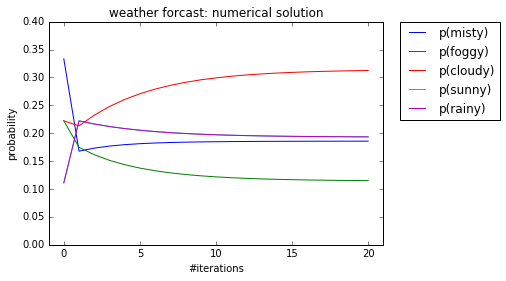

In [3]:
%matplotlib inline
import pylab as plt

plt.axis([-1,21,0,0.4])
plt.title("weather forcast: numerical solution")
plt.xlabel("#iterations")
plt.ylabel("probability")
plt.plot(record[:,0], label="p(misty)")
plt.plot(record[:,1], label="p(foggy)")
plt.plot(record[:,2], label="p(cloudy)")
plt.plot(record[:,3], label="p(sunny)")
plt.plot(record[:,4], label="p(rainy)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('isa.png')